In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_csv(r"C:\Machine Learning (ML)\Diabetes prediction\diabetes.csv")

In [40]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
df.head()
df.tail()
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [42]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
407,0,101,62,0,0,21.9,0.336,25,0
149,2,90,70,17,0,27.3,0.085,22,0
499,6,154,74,32,193,29.3,0.839,39,0
433,2,139,75,0,0,25.6,0.167,29,0
295,6,151,62,31,120,35.5,0.692,28,0
757,0,123,72,0,0,36.3,0.258,52,1
394,4,158,78,0,0,32.9,0.803,31,1
47,2,71,70,27,0,28.0,0.586,22,0
301,2,144,58,33,135,31.6,0.422,25,1
527,3,116,74,15,105,26.3,0.107,24,0


In [43]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
df[df["Glucose"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


Analysis

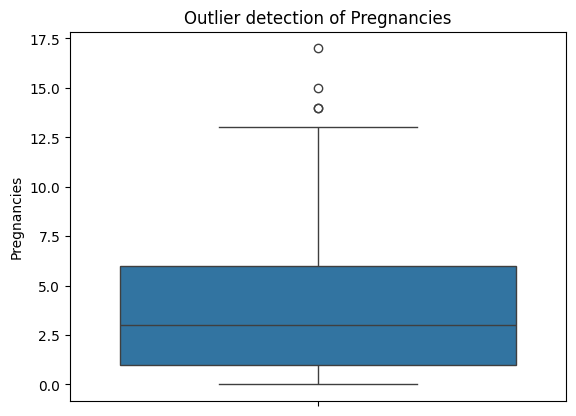

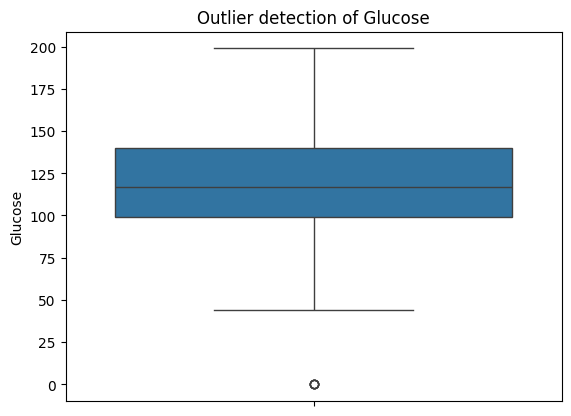

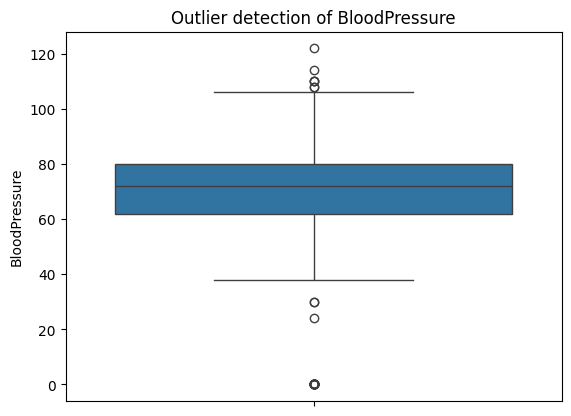

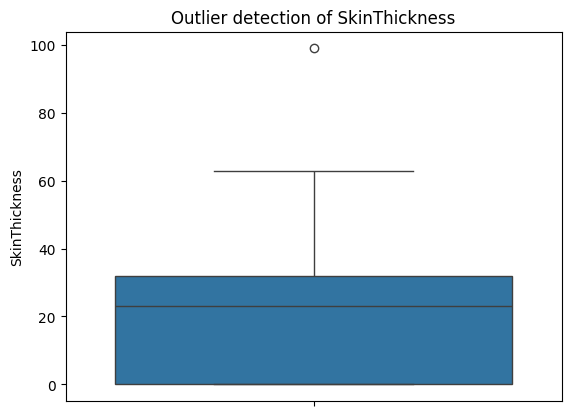

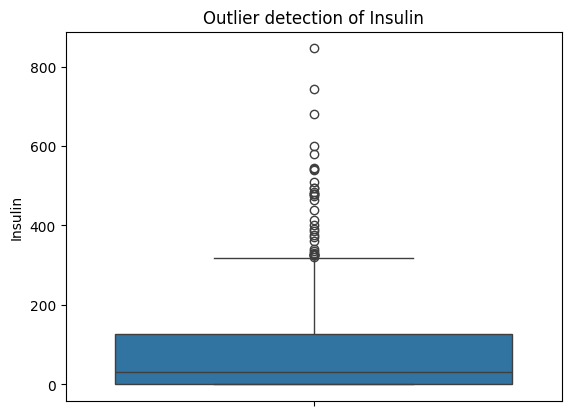

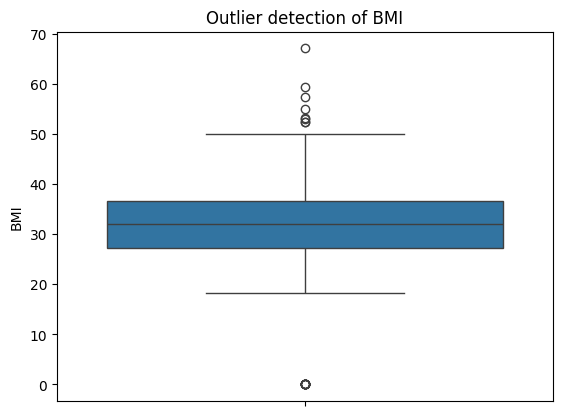

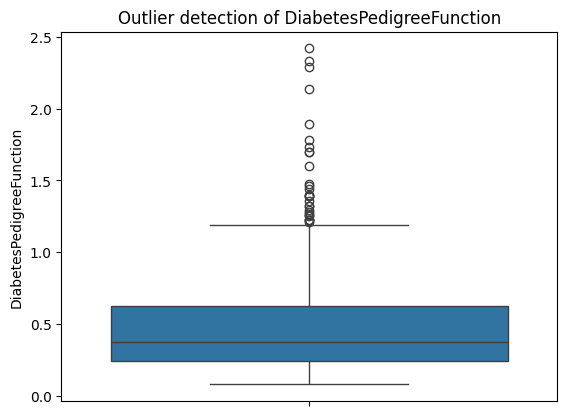

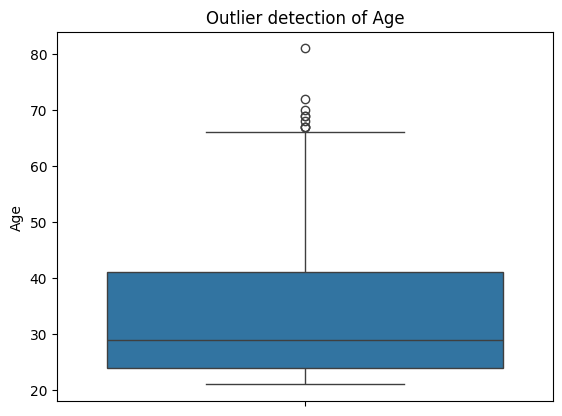

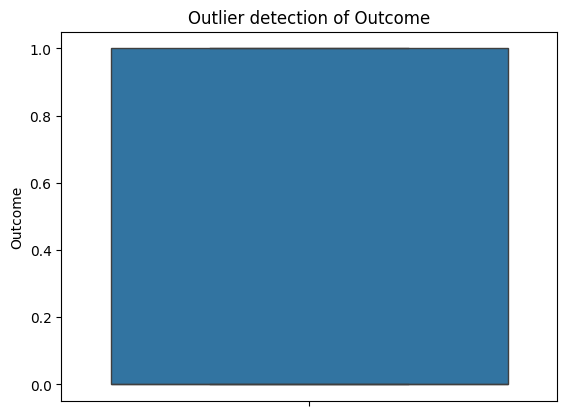

In [45]:
for i in df:
  plt.title(f"Outlier detection of {i}")
  sns.boxplot(df[i])
  plt.show()
  print()

In [46]:
# Iqr technique
q1= df["BMI"].quantile(0.25)
q3= df["BMI"].quantile(0.75)
iqr= q3-q1
min_range=q1-1.5*iqr
max_range=q3+1.5*iqr
df=df[(df["BMI"]>=min_range)&(df["BMI"]<=max_range)]
df.reset_index(drop=True, inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
744,10,101,76,48,180,32.9,0.171,63,0
745,2,122,70,27,0,36.8,0.340,27,0
746,5,121,72,23,112,26.2,0.245,30,0
747,1,126,60,0,0,30.1,0.349,47,1


In [47]:
lst=["Glucose","BloodPressure","SkinThickness","Insulin"]
for i in lst:
  df[i].replace(0,np.nan,inplace=True)
  df[i]=df[i].fillna(df[i].mean())


C:\Users\Vishnu Gopan\AppData\Local\Temp\ipykernel_10040\1414791828.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].replace(0,np.nan,inplace=True)
C:\Users\Vishnu Gopan\AppData\Local\Temp\ipykernel_10040\1414791828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].replace(0,np.nan,inplace=True)
C:\Users\Vishnu Gopan\AppData\L

In [48]:

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,3.858478,121.778226,72.263158,28.988743,154.868217,32.204005,0.469355,33.349800,0.347130
std,3.364052,30.481659,11.932632,8.715646,83.622579,6.491385,0.322737,11.728681,0.476375
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,120.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.988743,154.868217,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,154.868217,36.500000,0.626000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,50.000000,2.329000,81.000000,1.000000


In [49]:
x=df.drop(columns="Outcome")
y=df["Outcome"]


Scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler 
minmax=MinMaxScaler()
x_scaled=minmax.fit_transform(x)
x_scaled.max()


np.float64(1.0)

In [51]:
standard=StandardScaler()
x_sc=standard.fit_transform(x)


In [52]:
x_sc.min()

np.float64(-4.047339228367959)

In [53]:
x_sc.max()

np.float64(8.270417223912656)

In [54]:
x
var1=minmax.transform([[8,150,75,40,74,39,0.1,29]])
var1

c:\Users\Vishnu Gopan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.47058824, 0.68387097, 0.52040816, 0.35869565, 0.0709988 ,
        0.65408805, 0.00977343, 0.13333333]])

In [55]:
minmax.inverse_transform(x)

array([[1.020000e+02, 2.298400e+04, 7.080000e+03, ..., 1.086680e+03,
        1.489377e+00, 3.021000e+03],
       [1.700000e+01, 1.321900e+04, 6.492000e+03, ..., 8.640800e+02,
        8.681010e-01, 1.881000e+03],
       [1.360000e+02, 2.840900e+04, 6.296000e+03, ..., 7.591400e+02,
        1.590672e+00, 1.941000e+03],
       ...,
       [8.500000e+01, 1.879900e+04, 7.080000e+03, ..., 8.513600e+02,
        6.294950e-01, 1.821000e+03],
       [1.700000e+01, 1.957400e+04, 5.904000e+03, ..., 9.753800e+02,
        8.635990e-01, 2.841000e+03],
       [1.700000e+01, 1.445900e+04, 6.884000e+03, ..., 9.849200e+02,
        7.870650e-01, 1.401000e+03]])

DATA SPLITTING

In [56]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=0) 

Model Training

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [58]:
y_pred=knn_model.predict(x_test) 

In [59]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
tree_model=DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
y_pred=tree_model.predict(x_test)

Model Evaluation

In [61]:
tree_model.score(x_train,y_train)

1.0

Cross validation

In [62]:
from sklearn.model_selection import cross_val_score
cross_val_score(DecisionTreeClassifier(),x,y,cv=5).mean()

np.float64(0.7035704697986577)

In [64]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
model=GridSearchCV(SVC(),{"C":[0.001,0.01,0.1,1,10,100],"kernal":["linear","sigmoid","rbf","poly"]})
model=RandomizedSearchCV(SVC(),(DecisionTreeClassifier(),{"C":[0.1,1,10],"kernal":["rbf","sigmoid","poly"]}))

In [65]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7022222222222222


In [66]:
def predict():
  Pregnancies	= int(input())
  Glucose	=float(input())
  BloodPressure	=float(input())
  SkinThickness	=float(input())
  Insulin  =	float(input())
  BMI	= float(input())
  DiabetesPedigreeFunction = float(input())
  Age	=int(input())
  lst1=[Pregnancies, Glucose,	BloodPressure,SkinThickness,	Insulin, BMI,	DiabetesPedigreeFunction,	Age]
  var1=minmax.transform([[i for i in lst1]])
  pred=tree_model.predict(var1)
  if pred==1:
    return"Diabetes Positive."
  else:
    return "Diabetes Negative"




In [67]:
predict()

In [68]:
import pickle

In [69]:
with open("model.pkl","wb") as obj1:
    pickle.dump(tree_model,obj1)

In [70]:
with open("scaler.pkl","wb")as obj1:
    pickle.dump(minmax,obj1)